In [1]:
include("./general_utils/integrators.jl")
include("./general_utils/potentials.jl")
include("./general_utils/diffusion_tensors.jl")
include("./general_utils/probability_utils.jl")
include("./experiment_utils/experiments1D.jl")
include("./experiment_utils/experiments2D.jl")
include("./general_utils/integrator_utils.jl")
include("./general_utils/calculus.jl")

Main.Calculus

In [2]:
import .Integrators: eugen_gilles1D, euler_maruyama1D, hummer_leimkuhler_matthews1D, leimkuhler_matthews1D, leimkuhler_matthews_markovian1D, limit_method_with_variable_diffusion1D, euler_maruyama2D, eugen_gilles2D, naive_leimkuhler_matthews2D
import .Potentials: softWell1D, q4Potential, softQuadrupleWell2D, q4Potential2D
import .DiffusionTensors: Dconst1D, Dabs1D, Dquadratic1D, Dcosperturb1D, Dconst2D, Dcosperturb2D
import .ProbabilityUtils: compute_1D_invariant_distribution
import .Experiments: master_1D_experiment, run_1D_experiment_until_given_error
import .Experiments2D: master_2D_experiment
import .IntegratorUtils: MT2_1D, W2Ito1_1D, W2Ito1_2D, MT2_2D
import .Calculus: differentiate1D

In [6]:
exp_name = "eugen_gilles_cos_LMVD_1D_100K"    # Name
master_dir = "simulation_results"  # Directory to save results in
T = 100000                           # length of simulation
sigma = 1                            # value of kT (noise amplitude scaling)
num_repeats = 6     

# The potential and diffusion coefficents to use
potential = q4Potential
diffusion = Dcosperturb1D

save_dir = "$(master_dir)/$(exp_name)"
chunk_size = 100000;

In [7]:
# The step sizes to use (to use a single step size, set stepsizes = [stepsize])
num_step_sizes = 10

# The range of stepsizes to use (defualt 10 step sizes in the range 10^{-2} to 10^{-1})
stepsizes = 10 .^ range(-2.0,stop=-1.0,length=num_step_sizes);

In [8]:
# The integrators to use (comma separated list)
integrators = [eugen_gilles1D];

In [9]:
# The histogram parameters for binning
xmin = -5
xmax = 5
n_bins = 30

bin_boundaries = range(xmin, xmax, length=n_bins+1);

In [7]:
noise_integrator = W2Ito1_1D
n = 1

1

In [8]:
@info "Running: $(exp_name)"

master_1D_experiment(integrators, num_repeats, potential, diffusion, T, sigma, stepsizes, bin_boundaries, save_dir; chunk_size=chunk_size, x0=nothing, noise_integrator=noise_integrator, n=n)

[ Info: Running: eugen_gilles_cos_LMVD_1D_100K
[ Info: Computing the Invariant Distribution


Integral of f: 2.1558005495409276
Error in integral of f: 7.529340034491103e-10


[ Info: Running Experiments
[ Info: Running limit_method_with_variable_diffusion1D experiment
16.7%┣███████▏                                   ┫ 1/6 [00:01<Inf:Inf, InfGs/it]
100.0%┣███████████████████████████████████████████████┫ 6/6 [00:01<00:00, 4it/s]


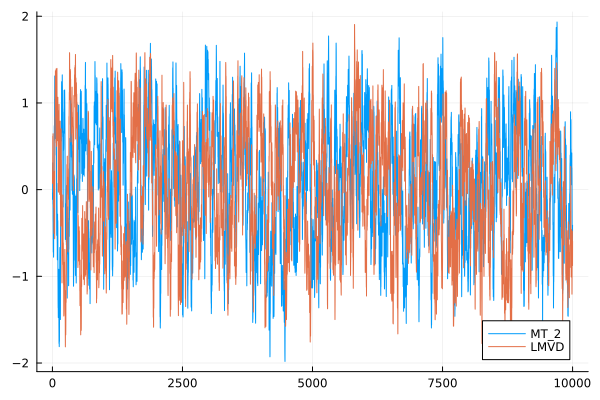

In [11]:
using Plots
using Random

x0 = 0
Vprime = differentiate1D(potential)
D_squared = x -> diffusion(x)^2
div_DDT = differentiate1D(D_squared)
sigma = 1
m = 10000
dt = 0.01
# reset random seed for reproducibility
Random.seed!(1234)
x_MT_2_1D, _ = eugen_gilles1D(x0, Vprime, diffusion, div_DDT, sigma::Number, m::Integer, dt::Number, nothing, MT2_1D);
Random.seed!(1234)
x_W2Ito1_1D, _ = eugen_gilles1D(x0, Vprime, diffusion, div_DDT, sigma::Number, m::Integer, dt::Number, nothing, W2Ito1_1D);
Random.seed!(1234)
div_D = differentiate1D(diffusion)
x_LMVD, _ = limit_method_with_variable_diffusion1D(x0, Vprime, diffusion, div_D, sigma::Number, m::Integer, dt::Number, nothing);

plot(x_MT_2_1D, label="MT_2")
#plot!(x_W2Ito1_1D, label="W2Ito1")
display(plot!(x_LMVD, label="LMVD"))

#display(plot(x_MT_2_1D - x_W2Ito1_1D, label="MT_2 - W2Ito1"))
#display(plot(x_MT_2_1D - x_EM, label="MT_2 - EM"))

# TODO List

<!-- 1. Make simplified function for running 1D experiments without transforms [Done]
2. Make simplified function for running 2D experiments without transforms
3. Make simplified function for running ND experiments without transforms
4. Implement 2D version of LMVD
5. Implement ND version of LMVD
6. Implement 1D version of Eugen-Gilles method [Done]
7. Implement 2D version of Eugen-Gilles method
8. Implement ND version of Eugen-Gilles method
9. Improved automated plot creation (with multiple integrators per figure)
10. Improved data management (create .txt files with mean and std convergence lines for each integrator)
11. Plots of compute time for fixed error
12. Comparison of effective stepsize
13. More interesting 2D problem where tensorial noise could be beneficial
14. Statistics problem? -->

4. Implement 2D version of Eugen-Gilles method

In [4]:
exp_name = "2D_test_300K_EM"    # Name
master_dir = "simulation_results"  # Directory to save results in
T = 300000                           # length of simulation
sigma = 1                            # value of kT (noise amplitude scaling)
num_repeats = 6     

# The potential and diffusion coefficents to use
potential = softQuadrupleWell2D
diffusion = Dcosperturb2D

save_dir = "$(master_dir)/$(exp_name)"
chunk_size = 100000;

In [5]:
# The step sizes to use (to use a single step size, set stepsizes = [stepsize])
num_step_sizes = 4

# The range of stepsizes to use (defualt 10 step sizes in the range 10^{-2} to 10^{-1})
stepsizes = 10 .^ range(-1.4,stop=-1.2,length=num_step_sizes);

In [6]:
integrators = [euler_maruyama2D];

In [7]:
noise_integrator = MT2_2D;

In [3]:
# Histogram parameters for binning
xmin = -3
xmax = 3
ymin = -3
ymax = 3
n_bins = 30   # number of bins in each dimension

master_2D_experiment(integrators, num_repeats, potential, diffusion, T, sigma, stepsizes, xmin, ymin, xmax, ymax, n_bins, save_dir; chunk_size=chunk_size, x0=nothing, noise_integrator=noise_integrator)

LoadError: UndefVarError: `chunk_size` not defined

In [3]:
include("./experiment_utils/experiments2D_with_transforms.jl")

Main.Experiments2DWithTransforms

In [4]:
import .Experiments2DWithTransforms: master_2D_experiment_with_transforms

In [5]:
exp_name = "QW2D_TT_LM_10K"
master_dir = "simulation_results"  # Directory to save results in
T = 300000                           # length of simulation
sigma = 1                            # value of kT (noise amplitude scaling)
num_repeats = 6     

# The potential and diffusion coefficents to use
potential = softQuadrupleWell2D
diffusion = Dcosperturb2D

save_dir = "$(master_dir)/$(exp_name)"
chunk_size = 100000;

In [6]:
num_step_sizes = 4

# The range of stepsizes to use (defualt 10 step sizes in the range 10^{-2} to 10^{-1})
stepsizes = 10 .^ range(-1.4,stop=-1.2,length=num_step_sizes);

In [7]:
time_transform = true

true

In [8]:
using LinearAlgebra
integrators = [naive_leimkuhler_matthews2D];
R = Matrix{Float64}(I, 2, 2);  # R matrix associated with the diffusion tensor (see paper for details)

In [9]:
# Histogram parameters for binning
xmin = -3
xmax = 3
ymin = -3
ymax = 3
n_bins = 30   # numb
master_2D_experiment_with_transforms(integrators, num_repeats, potential, diffusion, T, R, sigma, stepsizes, xmin, ymin, xmax, ymax, n_bins, save_dir; chunk_size=10000000, checkpoint=false, q0=nothing, time_transform=true)

[ Info: Computing Expected Probabilities


Integral of f: 0.7768438394074944
Error in integral of f: 1.1567569109683213e-8


[ Info: Running Experiments
[ Info: Running naive_leimkuhler_matthews2D experiment


bin indices1520


16.7%┣███████▏                                   ┫ 1/6 [00:01<Inf:Inf, InfGs/it]
100.0%┣███████████████████████████████████████████████┫ 6/6 [00:02<00:00, 2it/s]


bin indices1321
bin indices1524
bin indices615
bin indices1621
bin indices2225


LoadError: TaskFailedException

[91m    nested task error: [39mInexactError: Int64(0.27224787871364403)
    Stacktrace:
     [1] [0m[1mInt64[22m
    [90m   @[39m [90m./[39m[90m[4mfloat.jl:900[24m[39m[90m [inlined][39m
     [2] [0m[1mconvert[22m
    [90m   @[39m [90m./[39m[90m[4mnumber.jl:7[24m[39m[90m [inlined][39m
     [3] [0m[1msetindex![22m
    [90m   @[39m [90m./[39m[90m[4marray.jl:971[24m[39m[90m [inlined][39m
     [4] [0m[1mincrement_g_counts2D[22m[0m[1m([22m[90mq_chunk[39m::[0mMatrix[90m{Float64}[39m, [90mD[39m::[0mMain.Experiments2DWithTransforms.var"#11#13"[90m{typeof(Dcosperturb2D)}[39m, [90mx_bins[39m::[0mStepRangeLen[90m{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}[39m, [90my_bins[39m::[0mStepRangeLen[90m{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}[39m, [90mΣgI[39m::[0mMatrix[90m{Int64}[39m, [90mΣg[39m::[0mFloat64, [90mR[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m   @[39m [35mMain.Experiments2DWithTransforms.TransformUtils[39m [90m~/JuliaProjects/Integrators_for_Multiplicative_Noise/general_utils/[39m[90m[4mtransform_utils.jl:58[24m[39m
     [5] [0m[1mrun_chunk2D[22m[0m[1m([22m[90mintegrator[39m::[0mtypeof(naive_leimkuhler_matthews2D), [90mq0[39m::[0mVector[90m{Float64}[39m, [90mVprime[39m::[0mFunction, [90mD[39m::[0mFunction, [90mdiv_DDT[39m::[0mFunction, [90msigma[39m::[0mInt64, [90mdt[39m::[0mFloat64, [90msteps_to_run[39m::[0mInt64, [90mhist[39m::[0mFHist.Hist2D[90m{Int64, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}[39m, [90mx_bins[39m::[0mStepRangeLen[90m{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}[39m, [90my_bins[39m::[0mStepRangeLen[90m{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}[39m, [90msave_dir[39m::[0mString, [90mrepeat[39m::[0mInt64, [90mchunk_number[39m::[0mInt64, [90mtime_transform[39m::[0mBool, [90mΣgI[39m::[0mMatrix[90m{Int64}[39m, [90mΣg[39m::[0mFloat64, [90mD_diag[39m::[0mMain.Experiments2DWithTransforms.var"#11#13"[90m{typeof(Dcosperturb2D)}[39m, [90mR[39m::[0mMatrix[90m{Float64}[39m; [90midentity_D[39m::[0mBool[0m[1m)[22m
    [90m   @[39m [35mMain.Experiments2DWithTransforms[39m [90m~/JuliaProjects/Integrators_for_Multiplicative_Noise/experiment_utils/[39m[90m[4mexperiments2D_with_transforms.jl:87[24m[39m
     [6] [0m[1mmacro expansion[22m
    [90m   @[39m [90m~/JuliaProjects/Integrators_for_Multiplicative_Noise/experiment_utils/[39m[90m[4mexperiments2D_with_transforms.jl:178[24m[39m[90m [inlined][39m
     [7] [0m[1m(::Main.Experiments2DWithTransforms.var"#686#threadsfor_fun#9"{Main.Experiments2DWithTransforms.var"#686#threadsfor_fun#7#10"{Int64, Bool, Nothing, Bool, typeof(naive_leimkuhler_matthews2D), typeof(Main.Experiments2DWithTransforms.DiffusionTensors.Dconst2D), Int64, Matrix{Float64}, Int64, Vector{Float64}, Matrix{Float64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, String, Matrix{FHist.Hist2D}, Matrix{Float64}, Main.Experiments2DWithTransforms.Calculus.var"#7#10"{Main.Experiments2DWithTransforms.Calculus.var"#3#4"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xe0f937ec, 0xe46bce43, 0x5115e2f5, 0x8d73c7f4, 0x9b110c34), Expr}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xe0f937ec, 0xe46bce43, 0x5115e2f5, 0x8d73c7f4, 0x9b110c34), Expr}}, Main.Experiments2DWithTransforms.Calculus.var"#3#4"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xe0f937ec, 0xe46bce43, 0x5115e2f5, 0x8d73c7f4, 0x9b110c34), Expr}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xe0f937ec, 0xe46bce43, 0x5115e2f5, 0x8d73c7f4, 0x9b110c34), Expr}}}, Main.Experiments2DWithTransforms.Calculus.var"#1#2"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xbaaefab5, 0x11c0bf13, 0xd1f9ab47, 0x8e2a5f31, 0xfc717ce2), Expr}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0x72082009, 0xec935c22, 0x2a53daf2, 0x21b29658, 0xa4bf25f3), Expr}}, Bool, ProgressBars.ProgressBar}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @[39m [35mMain.Experiments2DWithTransforms[39m [90m./[39m[90m[4mthreadingconstructs.jl:194[24m[39m
     [8] [0m[1m#686#threadsfor_fun[22m
    [90m   @[39m [90m./[39m[90m[4mthreadingconstructs.jl:161[24m[39m[90m [inlined][39m
     [9] [0m[1m(::Base.Threads.var"#1#2"{Main.Experiments2DWithTransforms.var"#686#threadsfor_fun#9"{Main.Experiments2DWithTransforms.var"#686#threadsfor_fun#7#10"{Int64, Bool, Nothing, Bool, typeof(naive_leimkuhler_matthews2D), typeof(Main.Experiments2DWithTransforms.DiffusionTensors.Dconst2D), Int64, Matrix{Float64}, Int64, Vector{Float64}, Matrix{Float64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, String, Matrix{FHist.Hist2D}, Matrix{Float64}, Main.Experiments2DWithTransforms.Calculus.var"#7#10"{Main.Experiments2DWithTransforms.Calculus.var"#3#4"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xe0f937ec, 0xe46bce43, 0x5115e2f5, 0x8d73c7f4, 0x9b110c34), Expr}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xe0f937ec, 0xe46bce43, 0x5115e2f5, 0x8d73c7f4, 0x9b110c34), Expr}}, Main.Experiments2DWithTransforms.Calculus.var"#3#4"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xe0f937ec, 0xe46bce43, 0x5115e2f5, 0x8d73c7f4, 0x9b110c34), Expr}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xe0f937ec, 0xe46bce43, 0x5115e2f5, 0x8d73c7f4, 0x9b110c34), Expr}}}, Main.Experiments2DWithTransforms.Calculus.var"#1#2"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0xbaaefab5, 0x11c0bf13, 0xd1f9ab47, 0x8e2a5f31, 0xfc717ce2), Expr}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1,), Symbolics.var"#_RGF_ModTag", Symbolics.var"#_RGF_ModTag", (0x72082009, 0xec935c22, 0x2a53daf2, 0x21b29658, 0xa4bf25f3), Expr}}, Bool, ProgressBars.ProgressBar}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @[39m [90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:139[24m[39m

...and 5 more exceptions.
